# **Problem Set 3**

# Question 1  
Introduction:  
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.  
Occupations  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.  
Step 3. Assign it to a variable called users  
Step 4. Discover what is the mean age per occupation  
Step 5. Discover the Male ratio per occupation and sort it from the most to   the least   
Step 6. For each occupation, calculate the minimum and maximum ages  
Step 7. For each combination of occupation and sex, calculate the mean age  
Step 8. For each occupation present the percentage of women and men

In [1]:
# Step 1. Importing the necessary libraries

#Importing the pandas lib as pd

import pandas as pd


# Step 2. Importing the dataset from the given address

given_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

# Step 3. Assign it to a variable called users
users = pd.read_csv(given_url, sep='|')  # As the dataset uses a pipe '|' separator so used this
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
# Step 4. Discover what is the mean age per occupation

# Calculating the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()


print("Mean Age per Occupation:")
print("-" * 40)
print(f"{'Occupation':<20} | {'Mean Age':<8}")
print("-" * 40)
for occupation, age in mean_age_per_occupation.items():
    print(f"{occupation:<20} | {age:.2f} years")


Mean Age per Occupation:
----------------------------------------
Occupation           | Mean Age
----------------------------------------
administrator        | 38.75 years
artist               | 31.39 years
doctor               | 43.57 years
educator             | 42.01 years
engineer             | 36.39 years
entertainment        | 29.22 years
executive            | 38.72 years
healthcare           | 41.56 years
homemaker            | 32.57 years
lawyer               | 36.75 years
librarian            | 40.00 years
marketing            | 37.62 years
none                 | 26.56 years
other                | 34.52 years
programmer           | 33.12 years
retired              | 63.07 years
salesman             | 35.67 years
scientist            | 35.55 years
student              | 22.08 years
technician           | 33.15 years
writer               | 36.31 years


In [ ]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

# Calculating the male ratio per occupation
male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').mean())


male_ratio_per_occupation_sorted = male_ratio_per_occupation.sort_values(ascending=False)

# Printing the results
print("Male Ratio per Occupation (Sorted):")
print("-" * 50)
print(f"{'Occupation':<20} | {'Male Ratio (%)':<15}")
print("-" * 50)
for occupation, ratio in male_ratio_per_occupation_sorted.items():
    print(f"{occupation:<20} | {ratio * 100:.2f}%")


Male Ratio per Occupation (Sorted):
--------------------------------------------------
Occupation           | Male Ratio (%) 
--------------------------------------------------
doctor               | 100.00%
engineer             | 97.01%
technician           | 96.30%
retired              | 92.86%
programmer           | 90.91%
executive            | 90.62%
scientist            | 90.32%
entertainment        | 88.89%
lawyer               | 83.33%
salesman             | 75.00%
educator             | 72.63%
student              | 69.39%
other                | 65.71%
marketing            | 61.54%
writer               | 57.78%
none                 | 55.56%
administrator        | 54.43%
artist               | 53.57%
librarian            | 43.14%
healthcare           | 31.25%
homemaker            | 14.29%


In [ ]:
# Step 6. For each occupation, calculate the minimum and maximum ages

# Calculating the minimum and maximum ages per occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Printing the results
print("Minimum and Maximum Ages per Occupation:")
print("-" * 70)
print(f"{'Occupation':<20} | {'Min Age':<8} | {'Max Age':<8}")
print("-" * 70)
for occupation, ages in min_max_age_per_occupation.iterrows():
    print(f"{occupation:<20} | {ages['min']:<8} | {ages['max']:<8}")


Minimum and Maximum Ages per Occupation:
----------------------------------------------------------------------
Occupation           | Min Age  | Max Age 
----------------------------------------------------------------------
administrator        | 21       | 70      
artist               | 19       | 48      
doctor               | 28       | 64      
educator             | 23       | 63      
engineer             | 22       | 70      
entertainment        | 15       | 50      
executive            | 22       | 69      
healthcare           | 22       | 62      
homemaker            | 20       | 50      
lawyer               | 21       | 53      
librarian            | 23       | 69      
marketing            | 24       | 55      
none                 | 11       | 55      
other                | 13       | 64      
programmer           | 20       | 63      
retired              | 51       | 73      
salesman             | 18       | 66      
scientist            | 23       | 55      


In [ ]:
# Step 7. For each combination of occupation and sex, calculate the mean age

# Calculating the mean age per combination of occupation and sex
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()

# Printing the results
print("Mean Age per Occupation and Sex:")
print("-" * 50)
print(f"{'Occupation':<20} | {'gender':<5} | {'Mean Age':<8}")
print("-" * 50)
for _, row in mean_age_per_occupation_sex.iterrows():
    print(f"{row['occupation']:<20} | {row['gender']:<5} | {row['age']:<8.2f}")


Mean Age per Occupation and Sex:
--------------------------------------------------
Occupation           | gender | Mean Age
--------------------------------------------------
administrator        | F     | 40.64   
administrator        | M     | 37.16   
artist               | F     | 30.31   
artist               | M     | 32.33   
doctor               | M     | 43.57   
educator             | F     | 39.12   
educator             | M     | 43.10   
engineer             | F     | 29.50   
engineer             | M     | 36.60   
entertainment        | F     | 31.00   
entertainment        | M     | 29.00   
executive            | F     | 44.00   
executive            | M     | 38.17   
healthcare           | F     | 39.82   
healthcare           | M     | 45.40   
homemaker            | F     | 34.17   
homemaker            | M     | 23.00   
lawyer               | F     | 39.50   
lawyer               | M     | 36.20   
librarian            | F     | 40.00   
librarian            | M

In [ ]:
# Step 8. For each occupation present the percentage of women and men

occupation_gender = users.groupby(['occupation', 'gender']).gender.count()
count_occupation = users.groupby(['occupation']).gender.count()
final = round((occupation_gender/count_occupation)*100, 2).rename('%')
final = final.reset_index()
final.columns = ['Occupation', 'Gender', 'Percentage (%)']
final = pd.DataFrame(final)
print(final)


       Occupation Gender  Percentage (%)
0   administrator      F           45.57
1   administrator      M           54.43
2          artist      F           46.43
3          artist      M           53.57
4          doctor      M          100.00
5        educator      F           27.37
6        educator      M           72.63
7        engineer      F            2.99
8        engineer      M           97.01
9   entertainment      F           11.11
10  entertainment      M           88.89
11      executive      F            9.38
12      executive      M           90.62
13     healthcare      F           68.75
14     healthcare      M           31.25
15      homemaker      F           85.71
16      homemaker      M           14.29
17         lawyer      F           16.67
18         lawyer      M           83.33
19      librarian      F           56.86
20      librarian      M           43.14
21      marketing      F           38.46
22      marketing      M           61.54
23           non

# Question 2
Euro Teams  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address  
Step 3. Assign it to a variable called euro12  
Step 4. Select only the Goal column  
Step 5. How many team participated in the Euro2012?  
Step 6. What is the number of columns in the dataset?  
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline  
Step 8. Sort the teams by Red Cards, then to Yellow Cards  
Step 9. Calculate the mean Yellow Cards given per Team  
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G  
Step 12. Select the first 7 columns  
Step 13. Select all columns except the last 3  
Step 14. Present only the Shooting Accuracy from England, Italy and Russia  

In [ ]:
# Step 1. Import the necessary libraries

import pandas as pd


 # Step 2. Import the dataset from this address



# Step 3. Assign it to a variable called euro12

euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv", delimiter = ',')

euro12



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [ ]:
# Step 4. Select only the Goal column

euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [ ]:
# Step 5. How many team participated in the Euro2012?

team_total= len(euro12.groupby('Team').groups)
print("Total Teams Participated In Euro 2012: ", team_total)

# Step 6. What is the number of columns in the dataset?

no_of_columns = euro12.shape[1]
print("Total Number Of Columns In Euro12 Dataset are: ", no_of_columns)

Total Teams Participated In Euro 2012:  16
Total Number Of Columns In Euro12 Dataset are:  35


In [ ]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

print("Countries In Euro-12 With Total Yellow & Red Cards \n ")

discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

Countries In Euro-12 With Total Yellow & Red Cards 
 


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [ ]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

discipline

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [ ]:
# Step 9. Calculate the mean Yellow Cards given per Team

print("Mean Yellow Cards per Team \n")
mean_yellow_cards = euro12.groupby('Team')['Yellow Cards'].mean()
print(mean_yellow_cards)



Mean Yellow Cards per Team 

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [ ]:
# Step 10: Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Title and formatting the output with a different look
print("=============================================")
print("|   Teams that Scored More Than 6 Goals     |")
print("=============================================")
print("| Team                | Goals |")
print("|---------------------|-------|")
for index, row in teams_more_than_6_goals.iterrows():
    print(f"| {row['Team']:20} | {row['Goals']:5} |")
print("=============================================")


|   Teams that Scored More Than 6 Goals     |
| Team                | Goals |
|---------------------|-------|
| Germany              |    10 |
| Spain                |    12 |


In [ ]:
# Step 11. Select the teams that start with G

print("Teams That Start With 'G'")

(euro12[euro12['Team'].str.startswith('G')] )['Team']

Teams That Start With 'G'


,Team
5,Germany
6,Greece


In [ ]:
# Step 12. Select the first 7 columns

print("First 7 Columns")
euro12.iloc[:, :7]

First 7 Columns


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [ ]:
# Step 13. Select all columns except the last 3

print("All Columns Except Last 3")
euro12.iloc[:, :-3]

All Columns Except Last 3


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [ ]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

print("Shooting Accuracy For Italy, England & Russia \n")
euro12.loc[euro12.Team.isin(['Italy', 'England', 'Russia'])][['Team', 'Shooting Accuracy']]


Shooting Accuracy For Italy, England & Russia 



,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3  
Housing  
Step 1.Import the necessary libraries    
Step 2.Create 3 differents Series, each of length 100, as follows:  
• The first a random number from 1 to 4    
• The second a random number from 1 to 3  
•  The third a random number from 10,000 to 30,000

Step 3.Create a DataFrame by joinning the Series by column    
Step 4.Change the name of the columns to bedrs, bathrs, price_sqr_meter  
Step 5.Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'  
Step 6. Ops it seems it is going only until index 99. Is it true?   
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [ ]:
# Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

# Step 2: Create 3 different Series, each of length 100
s1 = pd.Series(np.random.randint(1, 4, 100))
s2 = pd.Series(np.random.randint(1, 3, 100))
s3 = pd.Series(np.random.randint(10000, 30000, 100))

# Step 3: Create a DataFrame by joining the Series by column
df = pd.DataFrame({'s1': s1, 's2': s2, 's3': s3})

# Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.rename(columns={'s1': 'bedrs', 's2': 'bathrs', 's3': 'price_sqr_meter'}, inplace=True)

# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
big_column_df = pd.DataFrame({'bigcolumn': pd.concat([s1, s2, s3], ignore_index=True)})

# Step 6: Ops it seems it is going only until index 99. Is it true?
is_index_99 = big_column_df.index[-1] == 99
print(is_index_99)  # Output will be True if the last index is 99, otherwise False

# Step 7: Reindex the DataFrame so it goes from 0 to 299
big_column_df.reset_index(drop=True, inplace=True)
big_column_df.index = pd.RangeIndex(start=0, stop=300, step=1)

# Display the result
print(big_column_df)


False
     bigcolumn
0            1
1            2
2            2
3            3
4            2
..         ...
295      19853
296      14113
297      21797
298      12387
299      25085

[300 rows x 1 columns]


In [ ]:
# Step 6: Ops it seems it is going only until index 99. Is it true?
is_index_99 = big_column_df.index[-1] == 99
print(is_index_99)  # Output will be True if the last index is 99, otherwise False



False


In [ ]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299
big_column_df.reset_index(drop=True, inplace=True)
big_column_df.index = pd.RangeIndex(start=0, stop=300, step=1)

# Display the result
print(big_column_df)

     bigcolumn
0            1
1            2
2            2
3            3
4            2
..         ...
295      19853
296      14113
297      21797
298      12387
299      25085

[300 rows x 1 columns]


# Question 4  
Wind Statistics  
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question.  
You should be able to perform all of these operations without using a for loop or other looping construct.  
The data in 'wind.data' has the following format:  
YrMoDy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL  
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71    
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from the attached file wind.txt  
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.  
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.  
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].  
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.  
Step 7. Compute how many non-missing values there are in total.  
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.  
A single number for the entire dataset.  
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days  
A different set of numbers for each location.  
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.  
A different set of numbers for each day.  
Step 11. Find the average windspeed in January for each location.  
Treat January 1961 and January 1962 both as January.  
Step 12. Downsample the record to a yearly frequency for each location.  
Step 13. Downsample the record to a monthly frequency for each location.  
Step 14. Downsample the record to a weekly frequency for each location.  
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [ ]:
#step 1

import numpy as np
import pandas as pd
import datetime as dt

#step 2
#reading the file
data = pd.read_fwf('wind.txt')

# Step 3

data.columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Set the Date column as the index and drop the original columns
data = data.set_index('Date').drop(columns=['Yr', 'Mo', 'Dy'])


data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [ ]:
# Step 4

def fix_years(df):

    df.index = df.index.where(df.index.year < 2060, df.index - pd.DateOffset(years=100))
    return df

data = fix_years(data)

data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [ ]:
# Step 5
data.index = pd.to_datetime(data.index)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [ ]:
# Step 6

missing_values = data.isna().sum()
print("Missing values per location:")
print(missing_values)
print("\nTotal missing values :",missing_values.sum())


Missing values per location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total missing values : 31


In [ ]:
# Step 7

print(f"Total non-missing values: {np.prod(data.shape) - data.isnull().sum().sum()}")

Total non-missing values: 78857


In [ ]:
# Step 8

mean_windspeed = data.mean().mean()
print("Mean windspeeds over all locations and times: ",mean_windspeed)

print("After rounding off ",round(mean_windspeed))


Mean windspeeds over all locations and times:  10.227982360836938
After rounding off  10


In [ ]:
# Step 9

loc_stats = data.agg(['min', 'max', 'mean', 'std'])
print("Location statistics:")
print(loc_stats)


Location statistics:
            RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


In [ ]:
# Step 10

day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)

day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [ ]:
# Step 11

data_january = data[data.index.month == 1]


average_january_windspeed = data_january.groupby(data_january.index.year).mean()
print("Average windspeed in January for each location:\n")
print(average_january_windspeed)


Average windspeed in January for each location:

            RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                     
1961  14.841333  11.988333  13.431613   7.736774  11.072759   8.588065   
1962  14.783871  13.160323  12.591935   7.538065  11.779677   8.720000   
1963  14.868387  11.112903  15.121613   6.635806  11.080645   7.835484   
1964  12.661290  11.818387  11.741290   6.953548  11.400645   6.865806   
1965  15.741613  15.546774  15.274194   8.258387  13.588065   9.251290   
1966  15.834839  13.283226  15.136452   8.659355  12.968065   9.163548   
1967  13.736129  11.470968  11.537419   6.928065  10.833548   6.730323   
1968  14.733226  12.829032  12.294194   7.849032  12.262581   7.133226   
1969  12.824839  12.113871  11.403871   6.708710  10.557097   5.926452   
1970  13.152581  11.731935  13.083871   5.810968   9.507742   8.040323   
1971  15.098065  13.398387  13.080000   6.364194  11.342258   7

In [ ]:
# Step 12

yearly_data = data.resample('Y').mean()
print("Yearly downsampled data:\n")
print(yearly_data)


Yearly downsampled data:

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.0

In [ ]:
# Step 13

monthly_data = data.resample('M').mean()
print("Monthly downsampled data:\n")
print(monthly_data)


Monthly downsampled data:

                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13

In [ ]:
# Step 14

weekly_data = data.resample('W').mean()
print("Weekly downsampled data:\n")
print(weekly_data)


Weekly downsampled data:

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14

In [ ]:
# Step 15


weekly_stats = data.resample('W', origin='1961-01-02').agg(['min', 'max', 'mean', 'std'])
weekly_stats_52_weeks = weekly_stats.head(52)
print("Weekly statistics for the first 52 weeks:\n")
print(weekly_stats_52_weeks)


Weekly statistics for the first 52 weeks:

              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.95142

# Question 5  
Step 1. Import the necessary libraries  
Step 2. Import the dataset from this address.  
Step 3. Assign it to a variable called chipo.  
Step 4. See the first 10 entries  
Step 5. What is the number of observations in the dataset?  
Step 6. What is the number of columns in the dataset?  
Step 7. Print the name of all the columns.  
Step 8. How is the dataset indexed?  
Step 9. Which was the most-ordered item?  
Step 10. For the most-ordered item, how many items were ordered?  
Step 11. What was the most ordered item in the choice_description column?   
Step 12. How many items were orderd in total?  
Step 13.  
• Turn the item price into a float  
• Check the item price type  
• Create a lambda function and change the type of item price  
• Check the item price type  
Step 14. How much was the revenue for the period in the dataset?  
 Step 15. How many orders were made in the period?  
Step 16. What is the average revenue amount per order?  
Step 17. How many different items are sold?  

In [2]:
# Step 1, 2, 3 , 4
import pandas as pd
chipo=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
# Step 5

print("Number of observation here is:", len(chipo))


Number of observation here is: 4622


In [ ]:
# Step 6

print("The Number of column here  is:", len(chipo.columns))

The number of column here  is: 5


In [ ]:
# Step 7


print("Column names in the dataset are : ", chipo.columns.values)

Column names in the dataset are :  ['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


In [ ]:
# Step 8

print("The dataset is indexed as ")
chipo.index


The dataset is indexed as 


RangeIndex(start=0, stop=4622, step=1)

In [ ]:
# Step 9

most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("The most ordered item is :",most_ordered_item)


The most ordered item is : Chicken Bowl


In [ ]:
# Step 10

most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("The item order count is ",most_ordered_item_count)


The item order count is  761


In [ ]:
# Step 11

print("The Most Ordered Item In Choice_Desc: ", chipo.groupby('choice_description').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).head(1).index[0])

The Most Ordered Item In Choice_Desc:  [Diet Coke]


In [ ]:
# Step 12

total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)


4972


In [ ]:
# Step 13

chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)
print(" changed type : ",chipo['item_price'].dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda x: int(x))
print("New changed type : ",chipo['item_price'].dtype)



 changed type :  float64
New changed type :  int64


In [ ]:
# Step 14

print("Total Revenue : ", (chipo['item_price'] * chipo['quantity']).sum())

Total Revenue :  36616


In [ ]:
# Step 15

print("Total Orders :", chipo['quantity'].sum())

num_orders = chipo['order_id'].nunique()
print("Total unique orders : ",num_orders)


Total Orders : 4972
Total unique orders :  1834


In [ ]:
# Step 16



print("Average Revenue per Order: ", (chipo['item_price'] * chipo['quantity']).mean())


Average Revenue per Order:  7.922111639982692


In [ ]:
# Step 17


num_different_items = chipo['item_name'].nunique()
print("Different Items Sold : ",num_different_items)


Different Items Sold :  50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


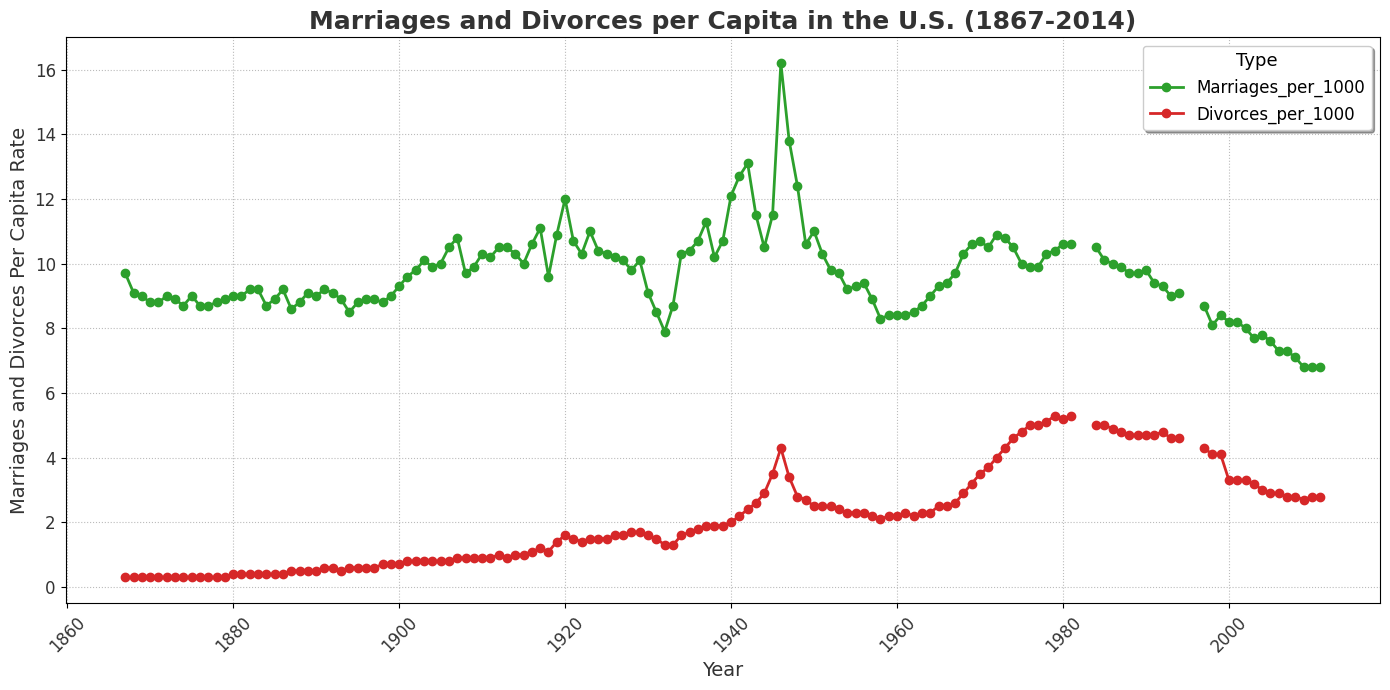

In [11]:
ax = df.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'], figsize=(14, 7), color=['#2ca02c', '#d62728'], linestyle='-', marker='o', linewidth=2)

plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Year', fontsize=14, color='#333333')
plt.ylabel('Marriages and Divorces Per Capita Rate', fontsize=14, color='#333333')

plt.legend(title='Type', title_fontsize='13', fontsize='12', loc='best', shadow=True, fancybox=True)
plt.grid(True, which='both', linestyle=':', linewidth=0.8, color='#bbbbbb')

plt.xticks(fontsize=12, rotation=45, color='#333333')
plt.yticks(fontsize=12, color='#333333')

plt.tight_layout()
plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

<bound method Axes.set of <Axes: title={'center': 'Marriages and Divorces per Capita in the U.S. for Selected Years'}, xlabel='Year', ylabel='Marriages and Divorces Per Capita Rate'>>

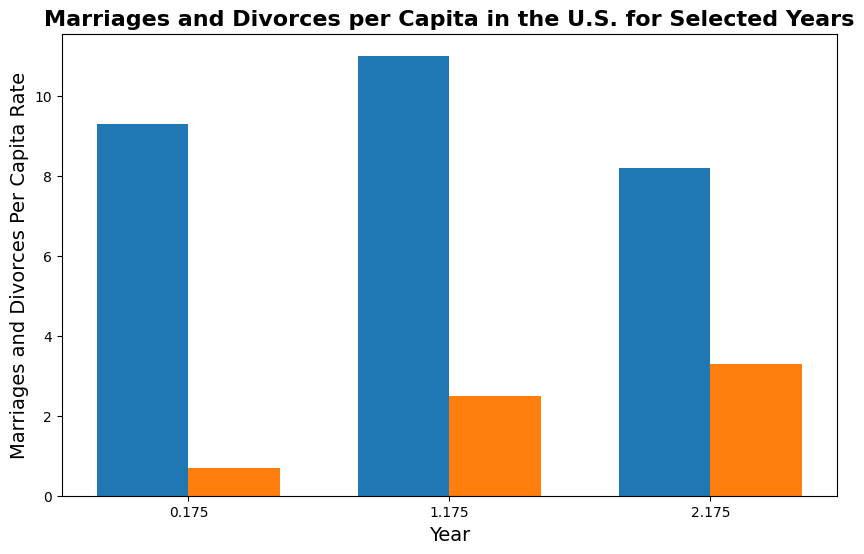

In [13]:
import matplotlib.pyplot as plt

# Data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
marriages_per_capita = [df.loc[df['Year'] == 1900, 'Marriages_per_1000'].values[0],
                        df.loc[df['Year'] == 1950, 'Marriages_per_1000'].values[0],
                        df.loc[df['Year'] == 2000, 'Marriages_per_1000'].values[0]]
divorces_per_capita = [df.loc[df['Year'] == 1900, 'Divorces_per_1000'].values[0],
                       df.loc[df['Year'] == 1950, 'Divorces_per_1000'].values[0],
                       df.loc[df['Year'] == 2000, 'Divorces_per_1000'].values[0]]

bar_width = 0.35
index = range(len(years))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, marriages_per_capita, bar_width, label='Marriages per Capita', color='#1f77b4')
bar2 = ax.bar([i + bar_width for i in index], divorces_per_capita, bar_width, label='Divorces per Capita', color='#ff7f0e')

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Marriages and Divorces Per Capita Rate', fontsize=14)
ax.set_title('Marriages and Divorces per Capita in the U.S. for Selected Years', fontsize=16, fontweight='bold')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set


# Question 8

 Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
 the actors by their kill count and label each bar with the corresponding actor's name.
 Don't forget to label your axes!

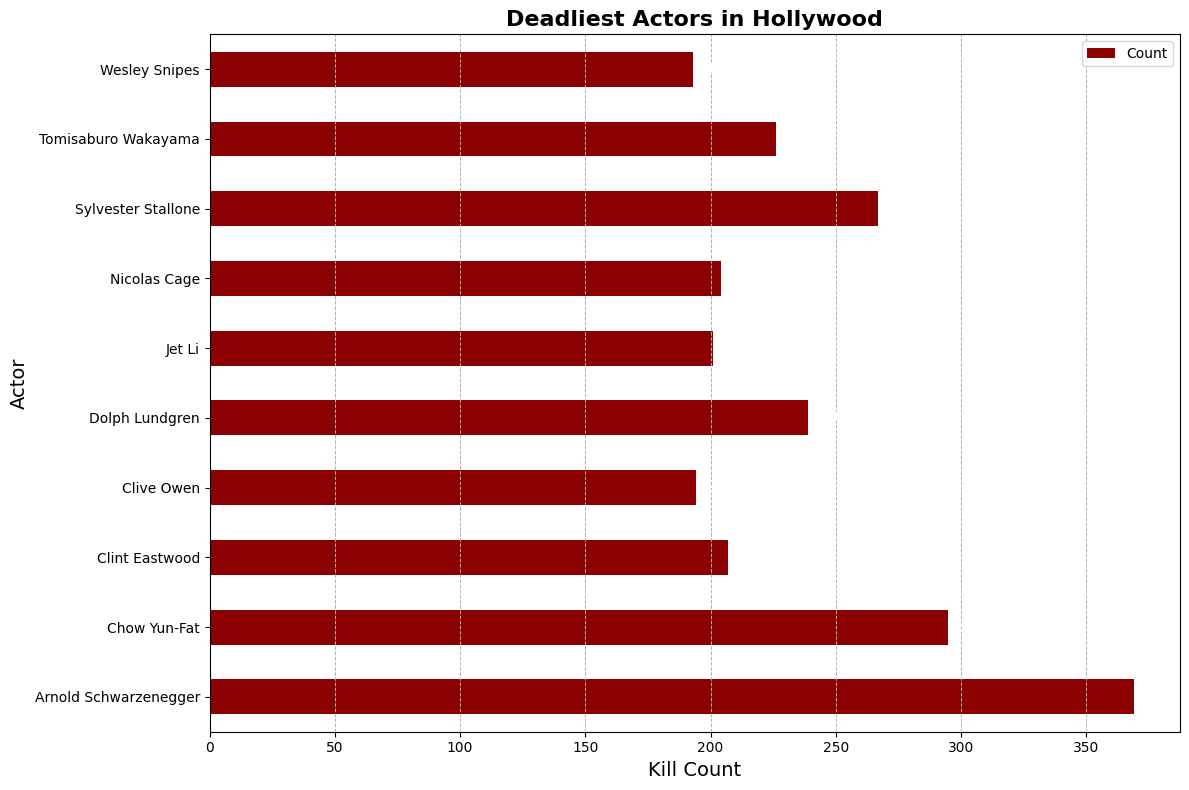

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

kills = pd.read_csv('actor_kill_counts.csv')
import matplotlib.pyplot as plt


ax = kills.plot.barh(x='Actor', y='Count', color='darkred', figsize=(12, 8))


for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{int(width)}', va='center', ha='left', fontsize=12, color='white')


plt.xlabel('Kill Count', fontsize=14)
plt.ylabel('Actor', fontsize=14)


plt.title('Deadliest Actors in Hollywood', fontsize=16, fontweight='bold')


plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()


# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

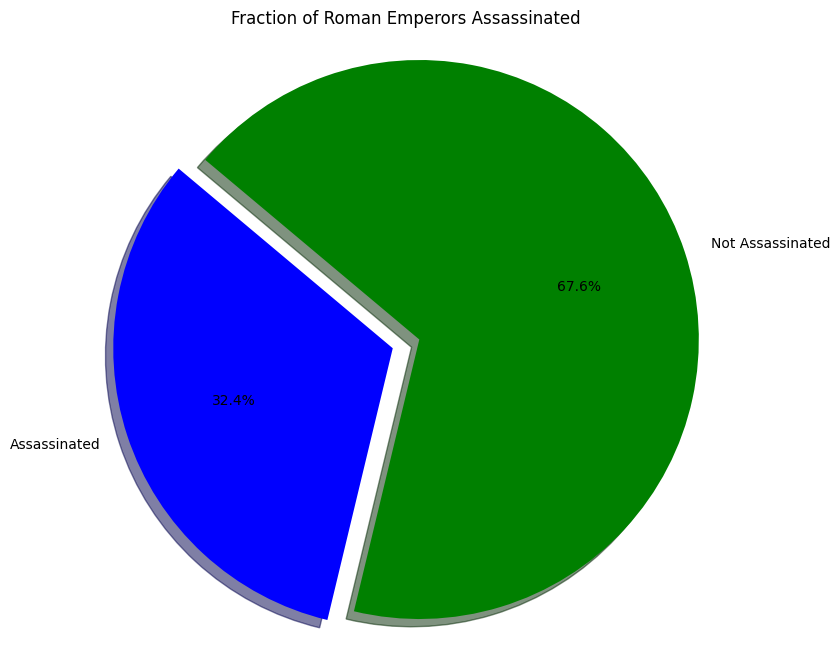

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("roman-emperor-reigns.csv")

# Count the number of emperors who were assassinated
assassinated_count = data[data['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

# Count the number of emperors who were not assassinated
not_assassinated_count = len(data) - assassinated_count

# Create data for the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count]
colors = ['blue', 'green']
explode = (0.1, 0)  # explode 1st slice

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

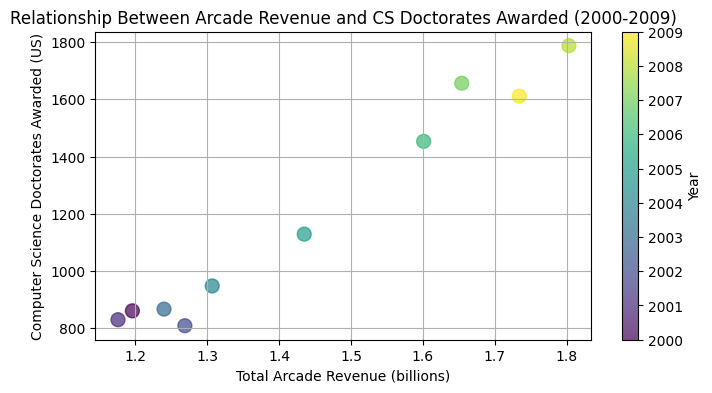

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

plt.figure(figsize=[8, 4])
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'],
    data['Computer Science Doctorates Awarded (US)'],
    c=data['Year'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

plt.colorbar(scatter, label='Year')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship Between Arcade Revenue and CS Doctorates Awarded (2000-2009)')
plt.grid(True)
plt.show()
